<a href="https://colab.research.google.com/github/arav7781/Data-Preprocessing/blob/main/FeatureAnalysis(ECB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = '/content/crypto_dataset_ecb_mode.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for class distribution (assuming 'target' is the target variable)
if 'Algorithm' in df.columns:
    print("\nClass Distribution:")
    print(df['Algorithm'].value_counts())
else:
    print("\nTarget column not found, please specify the correct target variable.")


Dataset Head:
  Algorithm                                               Key  \
0       AES                  76d4a52faa9f52b22b50db438cd72005   
1      3DES  2c386215dc6794d0157670abf45d703b619767dcc8437ae3   
2      3DES  ab0b1cf17f31d664b949a8fe73d3bf4f687c19a43d7f23fe   
3       DES                                  33fe02c124b4f7ea   
4       DES                                  28e02ce07eefa28b   

                          Plaintext  \
0  3546a8f328070f4bcbf91b6eae9d8776   
1  d5376a0c0cb741722e28fc677b211bcd   
2  6b34b0dfe1f67cf2c6de9999dc568df3   
3  789bf8b5498b293d587a87e34eb0add8   
4  cbb2a909cbd7f9bf7fd8b694baee19b5   

                                          Ciphertext  Ciphertext Length  \
0  ef259b6856d8fc0a748cd39e30a457c0aed7d1f5681854...                 32   
1   0190c33dedf3f63661f5104327e41679e8ba2cb9a9be0f29                 24   
2   e638067235ab39db52f12d871e394e6eea5c8919932039da                 24   
3   475a06fe81ac8c348528740af6d60d7294bf8fac1f442999        

In [13]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



Missing Values:
Algorithm                                  0
Key                                        0
Plaintext                                  0
Ciphertext                                 0
Ciphertext Length                          0
Byte Frequency Distribution                0
Byte Entropy                               0
N-gram Bigram Frequency                    0
N-gram Trigram Frequency                   0
Key Length Identification                  0
Randomness Chi-Square                      0
Randomness KS-Test                         0
Entropy per Block                          0
Pattern of Repeated Blocks                 0
Correlation Analysis Between Blocks    37419
Unique Byte Count                          0
Compression Ratio of Ciphertext            0
dtype: int64


In [14]:
# Drop the column 'Correlation Analysis Between Blocks' which has missing values
df = df.drop(columns=['Correlation Analysis Between Blocks'])

# Verify that the column has been dropped
print("\nColumns after dropping 'Correlation Analysis Between Blocks':")
print(df.columns)



Columns after dropping 'Correlation Analysis Between Blocks':
Index(['Algorithm', 'Key', 'Plaintext', 'Ciphertext', 'Ciphertext Length',
       'Byte Frequency Distribution', 'Byte Entropy',
       'N-gram Bigram Frequency', 'N-gram Trigram Frequency',
       'Key Length Identification', 'Randomness Chi-Square',
       'Randomness KS-Test', 'Entropy per Block', 'Pattern of Repeated Blocks',
       'Unique Byte Count', 'Compression Ratio of Ciphertext'],
      dtype='object')


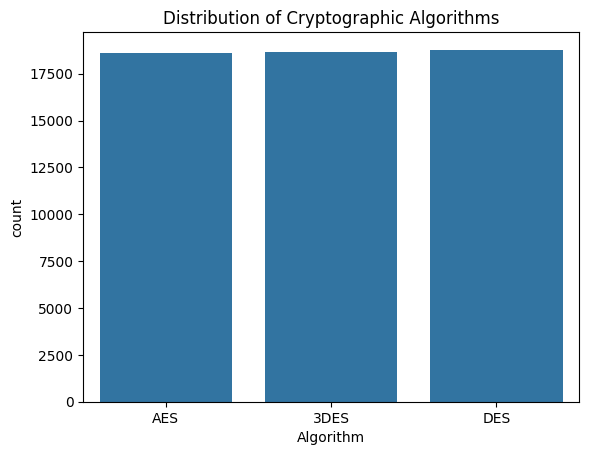


Class Distribution:
Algorithm
DES     18781
3DES    18638
AES     18581
Name: count, dtype: int64


In [15]:
# Visualize the distribution of the target variable 'Algorithm'
sns.countplot(x='Algorithm', data=df)
plt.title('Distribution of Cryptographic Algorithms')
plt.show()

# Display the count of each class
print("\nClass Distribution:")
print(df['Algorithm'].value_counts())


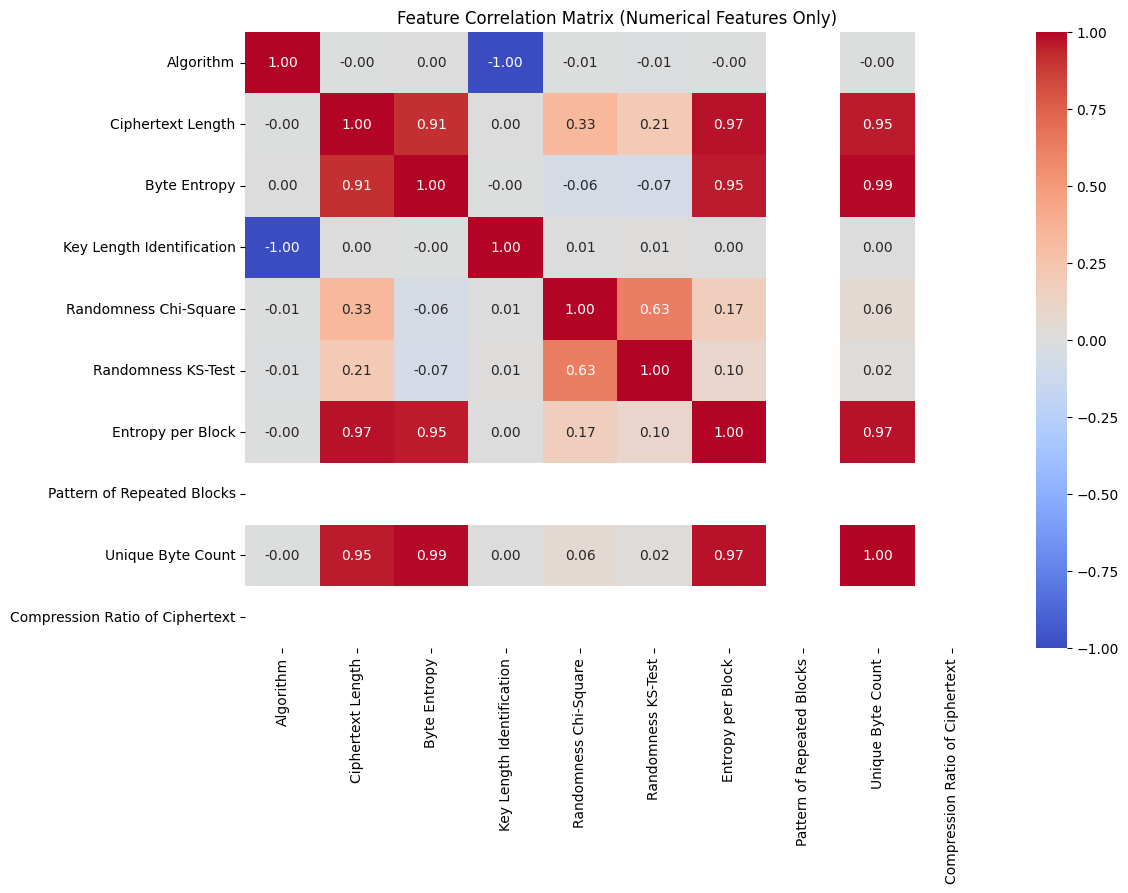


Correlation of Numerical Features with 'Ciphertext Length':
Ciphertext Length                  1.000000
Entropy per Block                  0.969157
Unique Byte Count                  0.953876
Byte Entropy                       0.912084
Randomness Chi-Square              0.334015
Randomness KS-Test                 0.209605
Key Length Identification          0.002201
Algorithm                         -0.002201
Pattern of Repeated Blocks              NaN
Compression Ratio of Ciphertext         NaN
Name: Ciphertext Length, dtype: float64
       Algorithm  Ciphertext Length  Byte Entropy  Key Length Identification  \
0              1                 32      4.812500                        128   
1              0                 24      4.584963                        192   
2              0                 24      4.386842                        192   
3              2                 24      4.501629                         64   
4              2                 24      4.334963          

In [18]:
# Select only numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Plot the heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix (Numerical Features Only)')
plt.show()

# Correlation of features with a specific target variable (e.g., 'Ciphertext Length')
corr_with_target = corr_matrix['Ciphertext Length'].sort_values(ascending=False)
print("\nCorrelation of Numerical Features with 'Ciphertext Length':")
print(corr_with_target)
print(numerical_features)

In [21]:
# Encode categorical target variable 'Algorithm'
label_encoder = LabelEncoder()
df['Algorithm'] = label_encoder.fit_transform(df['Algorithm'])
numerical_features = ['Ciphertext Length', 'Byte Entropy', 'Key Length Identification',
    'Randomness Chi-Square', 'Randomness KS-Test', 'Entropy per Block',
 'Compression Ratio of Ciphertext']
# Scale the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nFirst 5 rows of the dataset after preprocessing:")
print(df.head())



First 5 rows of the dataset after preprocessing:
   Algorithm                                               Key  \
0          1                  76d4a52faa9f52b22b50db438cd72005   
1          0  2c386215dc6794d0157670abf45d703b619767dcc8437ae3   
2          0  ab0b1cf17f31d664b949a8fe73d3bf4f687c19a43d7f23fe   
3          2                                  33fe02c124b4f7ea   
4          2                                  28e02ce07eefa28b   

                          Plaintext  \
0  3546a8f328070f4bcbf91b6eae9d8776   
1  d5376a0c0cb741722e28fc677b211bcd   
2  6b34b0dfe1f67cf2c6de9999dc568df3   
3  789bf8b5498b293d587a87e34eb0add8   
4  cbb2a909cbd7f9bf7fd8b694baee19b5   

                                          Ciphertext  Ciphertext Length  \
0  ef259b6856d8fc0a748cd39e30a457c0aed7d1f5681854...           1.419095   
1   0190c33dedf3f63661f5104327e41679e8ba2cb9a9be0f29          -0.704674   
2   e638067235ab39db52f12d871e394e6eea5c8919932039da          -0.704674   
3   475a06fe81ac8c

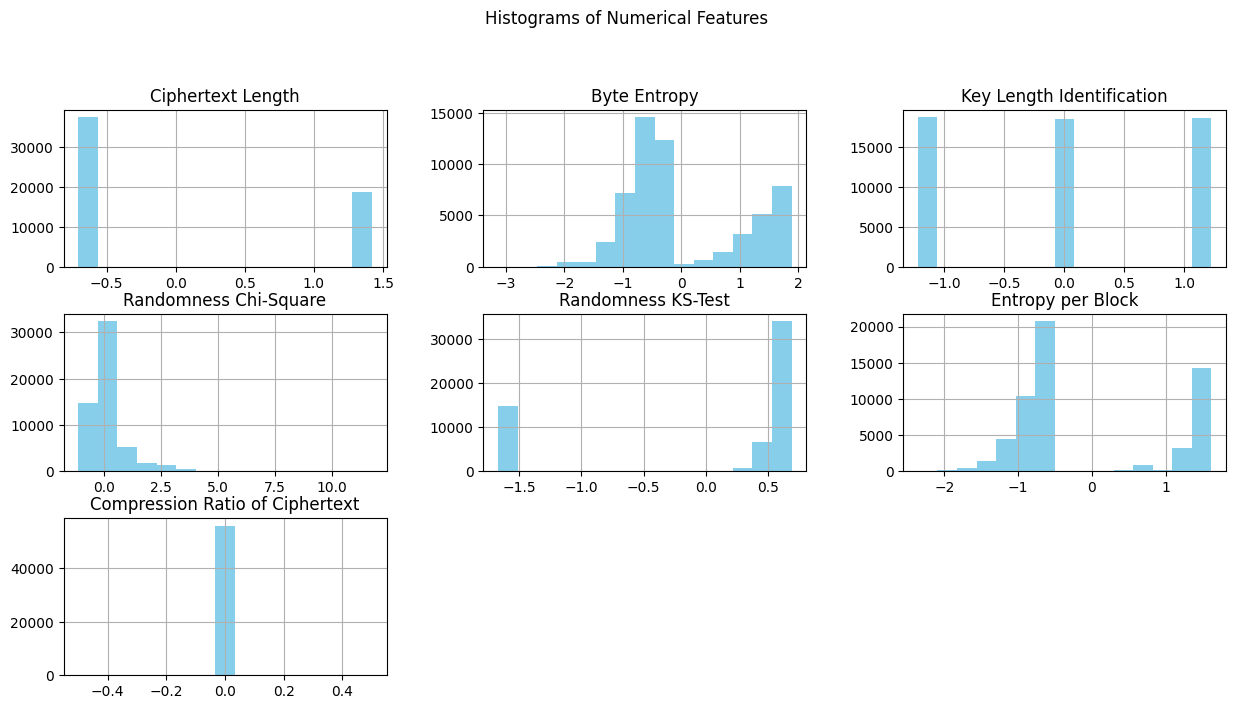

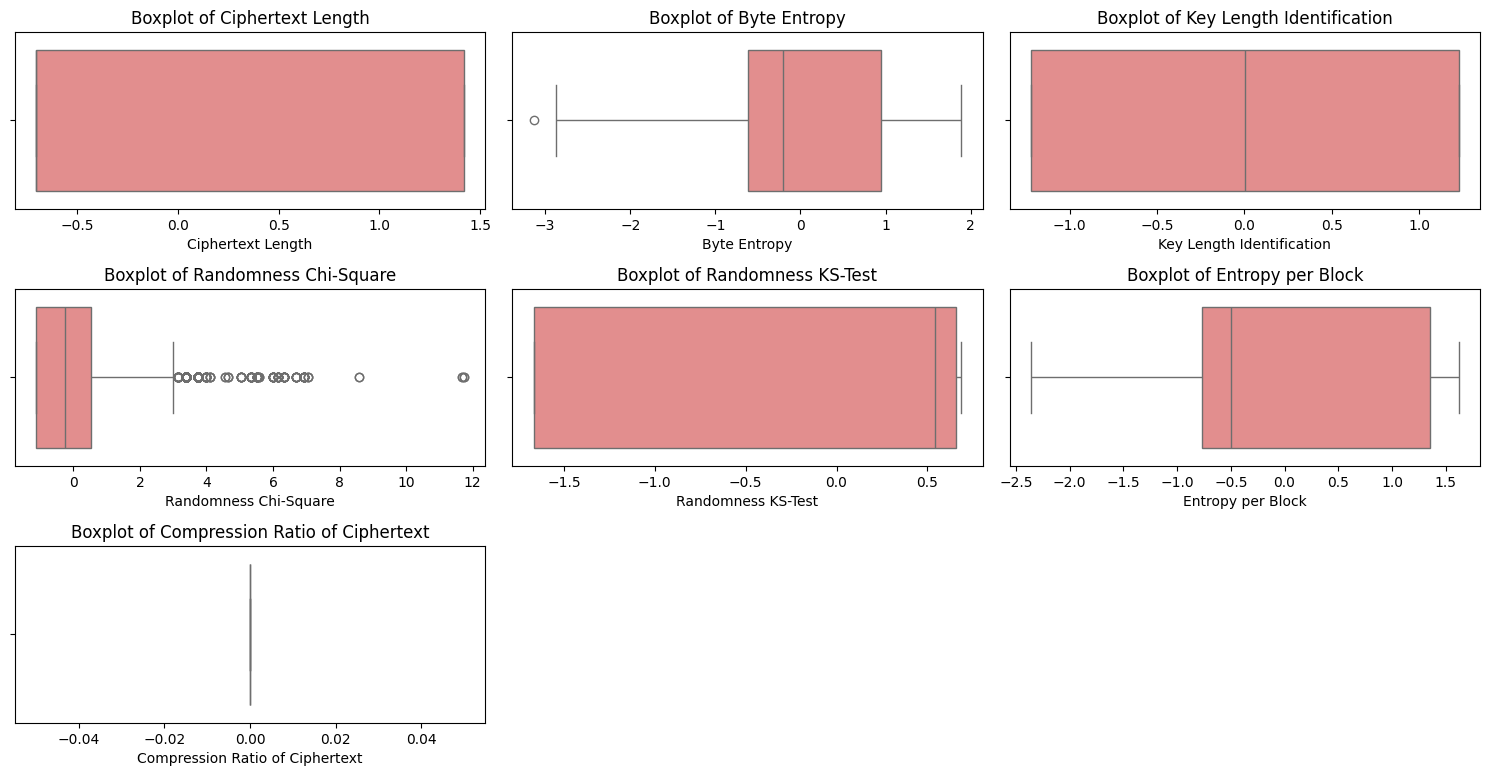

In [22]:
# Histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(4, 3), color='skyblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features to check for outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [23]:
# Pairplot to visualize relationships between numerical features and the target
sns.pairplot(df, hue='Algorithm', vars=numerical_features, palette='Set1')
plt.suptitle('Pairplot of Numerical Features by Algorithm', y=1.02)
plt.show()

# Boxplot for each numerical feature against the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Algorithm', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Algorithm')
plt.tight_layout()
plt.show()


<ipython-input-23-6c2ebd386a91>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y=feature, data=df, palette='Set2')
<ipython-input-23-6c2ebd386a91>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y=feature, data=df, palette='Set2')
<ipython-input-23-6c2ebd386a91>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y=feature, data=df, palette='Set2')
<ipython-input-23-6c2ebd386a91>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

In [24]:

df['Ciphertext/Key Length'] = df['Ciphertext Length'] / df['Key Length Identification']

# Update the numerical features list to include the new feature
numerical_features.append('Ciphertext/Key Length')

# Re-scale the new feature
df['Ciphertext/Key Length'] = scaler.fit_transform(df[['Ciphertext/Key Length']])


In [25]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [26]:
fig = px.scatter_matrix(numerical_features)
fig.update_layout(title='Scatter Matrix of Numerical Features',
                  width=1000, height=800)
fig.show()

In [28]:


heatmap_fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Viridis',
    colorbar=dict(title='Correlation Coefficient'),
))

heatmap_fig.update_layout(title='Correlation Matrix of Numerical Features',
                          xaxis_title='Features',
                          yaxis_title='Features',
                          width=800, height=800)
heatmap_fig.show()

In [30]:
# 3. Correlation with Target Variable
corr_with_target = corr_matrix['Algorithm'].sort_values(ascending=False)

target_corr_fig = px.bar(corr_with_target,
                         x=corr_with_target.index,
                         y=corr_with_target.values,
                         labels={'x': 'Features', 'y': 'Correlation with Algorithm'},
                         title='Correlation of Features')

target_corr_fig.update_layout(width=800, height=600)
target_corr_fig.show()


In [31]:
 #4. Distribution of 'Byte Entropy'
entropy_fig = px.histogram(df, x='Byte Entropy', nbins=50,
                           title='Distribution of Byte Entropy',
                           labels={'x': 'Byte Entropy', 'y': 'Count'})

entropy_fig.update_layout(width=800, height=600)
entropy_fig.show()

In [33]:
 #5. Scatter Plot: Ciphertext Length vs Byte Entropy colored by Algorithm
scatter_fig = px.scatter(df, x='Ciphertext Length', y='Byte Entropy', color='Algorithm',
                         title='Ciphertext Length vs Byte Entropy by Algorithm')

scatter_fig.update_layout(width=800, height=600)
scatter_fig.show()

In [34]:
# 6. Box Plot: Entropy per Block by Algorithm
box_fig = px.box(df, x='Algorithm', y='Entropy per Block',
                 title='Entropy per Block Distribution by Algorithm')

box_fig.update_layout(width=800, height=600)
box_fig.show()


In [35]:
# 7. Histogram of Key Length Identification
key_length_fig = px.histogram(df, x='Key Length Identification', color='Algorithm',
                              title='Key Length Identification Distribution by Algorithm',
                              labels={'x': 'Key Length Identification', 'y': 'Count'})

key_length_fig.update_layout(width=800, height=600)
key_length_fig.show()

In [37]:
# Save the preprocessed dataset for future use
processed_file_path = 'C:\\Users\\aravs\\Desktop\\CryptographicALGOidentifier\\processed_crypto_dataset.csv'
df.to_csv(processed_file_path, index=False)
print(f"\nPreprocessed dataset saved to {processed_file_path}")



Preprocessed dataset saved to C:\Users\aravs\Desktop\CryptographicALGOidentifier\processed_crypto_dataset.csv
